In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Z-score method**

In [52]:
df = pd.read_csv('placement.csv')

In [53]:
df.sample(5)

,cgpa,placement_exam_marks,placed
585,7.85,49.0,1
156,6.40,34.0,0
380,7.12,31.0,1
860,7.51,21.0,0
428,7.89,46.0,0


In [54]:
df.shape

(1000, 3)

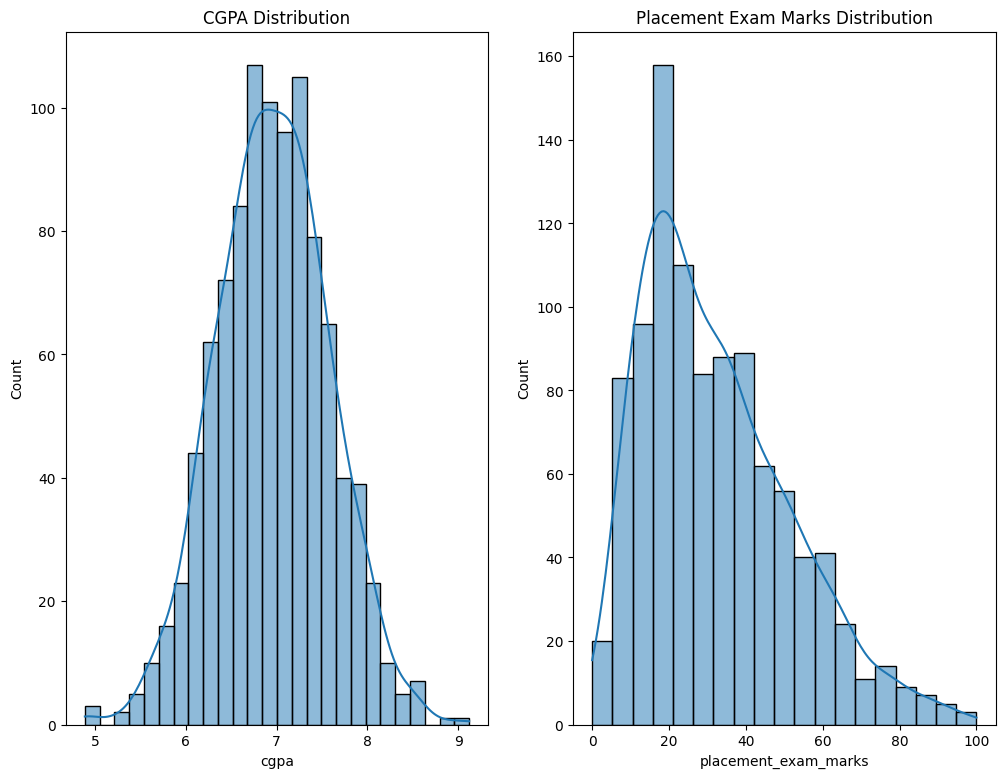

In [55]:
fig,axes = plt.subplots(1,2,figsize = (12,9))

sns.histplot(df["cgpa"], kde=True, ax=axes[0])
axes[0].set_title("CGPA Distribution")

sns.histplot(df["placement_exam_marks"], kde=True, ax=axes[1])
axes[1].set_title("Placement Exam Marks Distribution")

plt.show()


In [56]:
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())


Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [57]:
#outlier detection in normal distributin
df[(df['cgpa']>8.8) | (df['cgpa'] < 5.11) ]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## **Trimming**

In [58]:
new_df = df[(df['cgpa']<8.8) & (df['cgpa'] > 5.11) ]


In [59]:
new_df.shape

(995, 3)

In [60]:
#approach 2

#Z-score

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [61]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [62]:
#trimming
new_df = df[(df['cgpa_zscore']<3) & (df['cgpa_zscore']>-3)]

## **Capping**

In [63]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [64]:
df['cgpa'] = np.where(df['cgpa']>upper_limit,
                      upper_limit,
                      np.where(df['cgpa']<lower_limit,
                               lower_limit,
                               df['cgpa']))

# **IQR method**

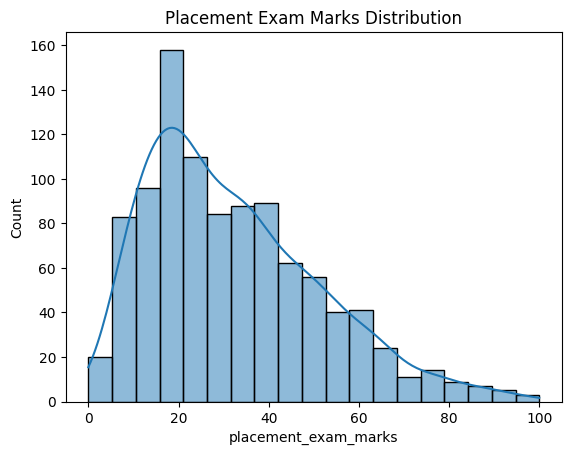

In [65]:
#skewed sistribution
sns.histplot(df["placement_exam_marks"], kde=True)
plt.title("Placement Exam Marks Distribution");

In [66]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


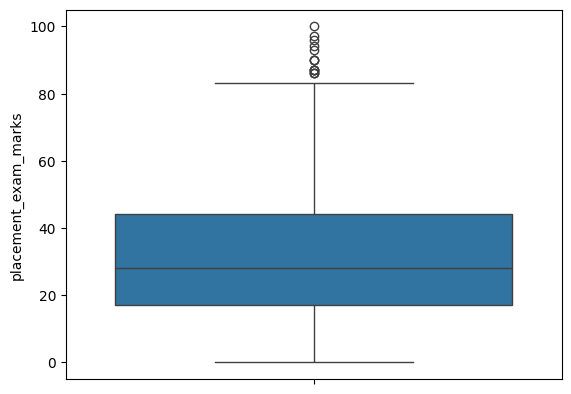

In [67]:
#shows outliers pnly above Q3
sns.boxplot(df['placement_exam_marks']);

In [68]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)


In [69]:
IQR = percentile75 - percentile25

In [70]:
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR

In [71]:
upper_limit

np.float64(84.5)

In [72]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


## **Trimming**

In [73]:
new_df = df[df['placement_exam_marks'] < upper_limit]


In [74]:
new_df.shape

(985, 4)

In [75]:
new_df_cap = df.copy()

new_df_cap['placement'] = np.where(df['placement_exam_marks']>upper_limit,
                      upper_limit,
                      np.where(df['placement_exam_marks']<lower_limit,
                               lower_limit,
                               df['placement_exam_marks']))

In [76]:
new_df_cap.shape

(1000, 5)

# **Winsorization**

In [77]:
df = pd.read_csv('weight-height.csv')

In [78]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [79]:
df.shape

(10000, 3)

In [80]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


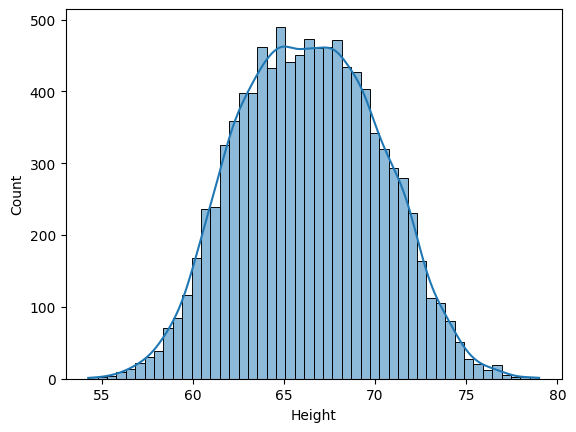

In [81]:
sns.histplot(df['Height'], kde=True);

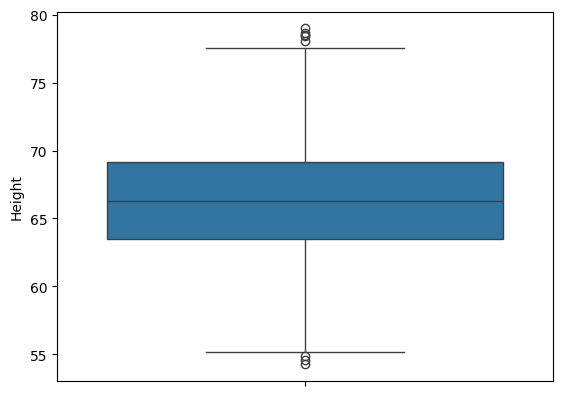

In [82]:
sns.boxplot(df['Height']);

In [83]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [84]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

In [85]:
new_df = df[(df['Height'] <= 74.78 )| (df['Height'] >= 58.13)]
new_df.shape


(10000, 3)

In [86]:
new_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [87]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
